# Training Python Day 2 (23 Februari 2019)
# Pemateri: Christopher Salim

## Identifikasi Fasies dari Data GR Log menggunakan Metode Machine Learning: Parameter GR

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('CAX_LogFacies_Train_File.csv') # load CSV

In [3]:
data = data[['GR','label']] # ambil bagian nilai GR dan label saja
data.head() # menampilkan 5 baris pertama

,GR,label
0,143.510000,0
1,112.790928,0
2,123.531856,0
3,111.692784,0
4,123.613712,0


In [4]:
data.iloc[0] # cara melihat satu data
data.iloc[1:4] # cara melihat beberapa data

,GR,label
1,112.790928,0
2,123.531856,0
3,111.692784,0


In [5]:
data[(data['label'] == 0) & (data['GR'] > 120)] # memberi kondisi untuk hanya mengambil yang label 0 
# dan GR lebih dari 120

,GR,label
0,143.510000,0
2,123.531856,0
4,123.613712,0
5,120.414641,0
6,123.145569,0
...,...,...
4399995,161.799008,0
4399996,142.631756,0
4399997,142.734504,0
4399998,140.037252,0


In [6]:
data = data.rename(columns={'GR': 'Nilai GR'}) # mengganti nama column

## Data Exploration

In [7]:
data.count() # mengetahui berapa data di tiap kolom

Nilai GR    4400000
label       4400000
dtype: int64

In [8]:
data.describe()

,Nilai GR,label
count,4.400000e+06,4.400000e+06
mean,1.092733e+02,1.184489e+00
std,3.424240e+01,1.465016e+00
min,-3.181915e+00,0.000000e+00
25%,8.179222e+01,0.000000e+00
50%,1.203849e+02,0.000000e+00
75%,1.347291e+02,2.000000e+00
max,1.970614e+02,4.000000e+00


<IPython.core.display.Javascript object>


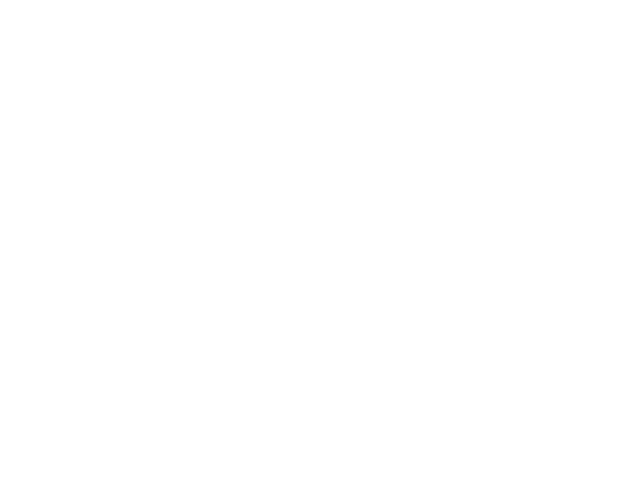

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c29b12080>,
      dtype=object)

In [9]:
%matplotlib notebook
data.hist() # cari tahu distribusi data

Untuk sementara, kita tidak delete data outlier ini.

In [10]:
data.groupby('label').mean() # mengecek rata-rata nilai GR untuk setiap label dengan groupby

,Nilai GR
label,
0,132.141165
1,82.115153
2,57.847181
3,97.837936
4,98.146792


## Preprocessing

In [11]:
GR = data['Nilai GR'].values
GR = GR.reshape(-1,1)
GR

array([[143.51      ],
       [112.79092812],
       [123.53185623],
       ...,
       [142.73450409],
       [140.03725205],
       [152.4       ]])

In [12]:
label = data['label'].values
label = label.reshape(-1,1)
label

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

standarized = scaler.fit_transform(GR)

In [14]:
standarized

array([[0.99983502],
       [0.10272856],
       [0.41640197],
       ...,
       [0.97718777],
       [0.89841839],
       [1.25945472]])

In [15]:
import numpy as np
print('standar deviasi adalah = ' + str(np.std(standarized)))
print('mean adalah = ' + str(np.mean(standarized)))

standar deviasi adalah = 0.9999999999999997
mean adalah = -2.948881542992736e-16


Text(0.5, 0, 'Standarized value')

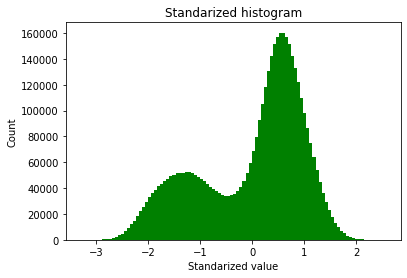

In [16]:
n_bins = 100
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(standarized, bins=n_bins, color='green')
plt.title('Standarized histogram')
plt.ylabel('Count')
plt.xlabel('Standarized value')

In [17]:
minmaxscale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled = minmaxscale.fit_transform(GR)

In [18]:
scaled

array([[0.73256828],
       [0.57915957],
       [0.63279895],
       ...,
       [0.72869551],
       [0.71522564],
       [0.77696426]])

Text(0.5, 0, 'Normalized value')

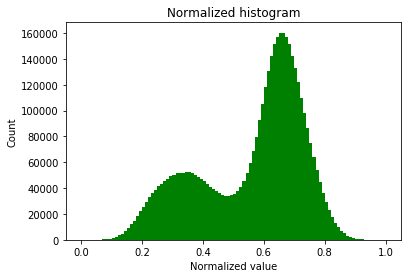

In [19]:
plt.hist(scaled, bins=n_bins, color='green')
plt.title('Normalized histogram')
plt.ylabel('Count')
plt.xlabel('Normalized value')

Cari outlier dengan menggunakan prinsip jangkauan antarkuartil (IQR). Jika data lebih kecil dari 1.5 x Q1 atau lebih besar dari 1.5 x Q3, data termasuk outlier.

In [20]:
def cari_outlier(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return np.where((x > upper_bound) | (x < lower_bound))

In [21]:
deleted = cari_outlier(scaled)
print(deleted)

(array([ 530870,  658636,  789038, 1061781, 1091903, 1176153, 1176163,
       1483998, 1652876, 1754158, 1785044, 1987925, 2033036, 2049889,
       2114311, 2190203, 2350111, 2757399, 3079241, 3464663, 3595015,
       3647080, 3878321, 4100190]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0]))


In [22]:
for k in deleted[0]:
    data.drop(data.index[[k]], inplace=True) # untuk kali ini, coba delete data yang outlier

In [23]:
data

,Nilai GR,label
0,143.510000,0
1,112.790928,0
2,123.531856,0
3,111.692784,0
4,123.613712,0
...,...,...
4399995,161.799008,0
4399996,142.631756,0
4399997,142.734504,0
4399998,140.037252,0


In [24]:
GR = scaler.fit_transform(data['Nilai GR'].values.reshape(-1,1))
label = data['label'].values.reshape(-1,1)

## Membuat model machine learning

In [25]:
from sklearn.model_selection import train_test_split
GR_train, GR_test, label_train, label_test = train_test_split(GR, label,
                                                              train_size = 0.8, test_size = 0.2, shuffle=True)

In [26]:
print('Dimensi train data = ' + str(GR_train.shape))
print('Dimensi test data = ' + str(GR_test.shape))

Dimensi train data = (3519980, 1)
Dimensi test data = (879996, 1)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(GR_train, label_train)

/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
label_predict = knn.predict(GR_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
acc = accuracy_score(label_test, label_predict, normalize=True, sample_weight=None)
print(acc)
# confusion matrix
matrix = confusion_matrix(label_test, label_predict)
class_names = (0, 1, 2, 3, 4)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.625607389124496


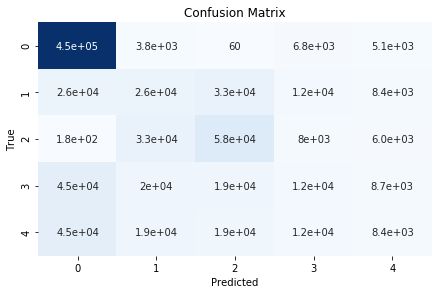

<Figure size 720x432 with 0 Axes>

In [30]:
# confusion matrix
matrix = confusion_matrix(label_test, label_predict)
# visualisasi
sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.figure(figsize=[10,6])
plt.show()

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(label_test, label_predict, average=None)
print(f1)

[0.87175651 0.24905022 0.49476609 0.15586705 0.11995153]


Hasil KNN kurang baik di orde 5. Coba diiterasikan dengan beberapa nilai orde lalu dibandingkan

In [37]:
# solusi
accuracy = []
for k in range(1,10):
    print('Sedang melakukan KNN orde ke ' + str(k))
    knn = KNeighborsClassifier(n_neighbors=k).fit(GR_train, label_train)
    label_predict = knn.predict(GR_test)
    accuracy.append(accuracy_score(label_test, label_predict, normalize=True, sample_weight=None))

Sedang melakukan KNN orde ke 1


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 2


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 3


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 4


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 5


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 6


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 7


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 8


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Sedang melakukan KNN orde ke 9


/home/christophersalim_/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Text(0.5, 1.0, 'Accuracy terhadap nilai K')

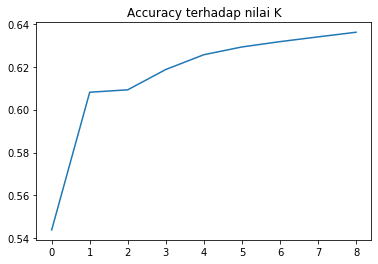

In [42]:
plt.plot(accuracy)
plt.title('Accuracy terhadap nilai K')

Nilai accuracy berbanding lurus dengan nilai k, karena nilai k rendah cenderung menyebabkan overfitting.